## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset

In [3]:
df = pd.read_csv('international-airline-passengers.csv')

df

,1949-01,112
0,1949-02,118
1,1949-03,132
2,1949-04,129
3,1949-05,121
4,1949-06,135
...,...,...
138,1960-08,606
139,1960-09,508
140,1960-10,461
141,1960-11,390


Pandas has set the first row as header/column name by default.

Changing the header back to row.

In [4]:
df = pd.read_csv('international-airline-passengers.csv', header = None)

df.head()

,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### Changing the column names further

In [5]:
df.columns = ['date', 'passengers']

df.head()

,date,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### Formatting the date column

In [6]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m')

In [7]:
df.head()

,date,passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
print('Time period start: {}\nTime period end: {}'.format(df.date.min(),df.date.max()))

Time period start: 1949-01-01 00:00:00
Time period end: 1960-12-01 00:00:00


Data is from 1949-1960 = 11 years

### Making date column the index column

In [9]:
df = df.set_index('date')

df.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Data Exploration

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [11]:
df.isnull().sum()

passengers    0
dtype: int64

In [12]:
df.describe()

,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


## Visualising the trend and seasonality in data

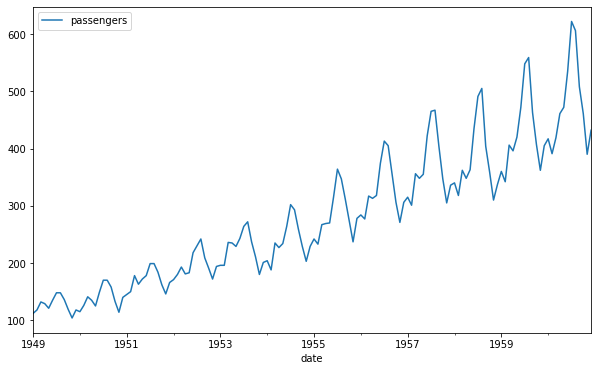

In [13]:
df.plot(figsize=(10, 6))

plt.show()

We can see an increasing trend here

## Moving Average

In [14]:
moving_avg = pd.Series(df["passengers"]).rolling(window=12).mean()

moving_avg

date
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: passengers, Length: 144, dtype: float64

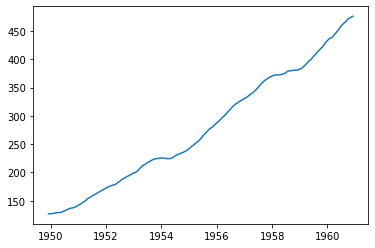

In [15]:
plt.plot(moving_avg)

There still is an increasing trend in the data

## Log Transformation

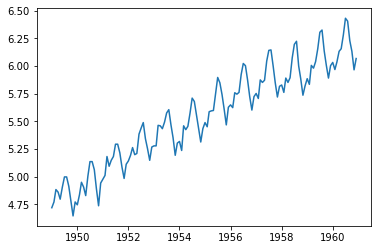

In [16]:
data = df

data_log = np.log(data)

plt.plot(data_log)

Trend and seasonality both are there in data.

It means log transformation did not help.

## Differencing

In [17]:
data_log_diff = data_log["passengers"] - data_log["passengers"].shift()

data_log_diff

date
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: passengers, Length: 144, dtype: float64

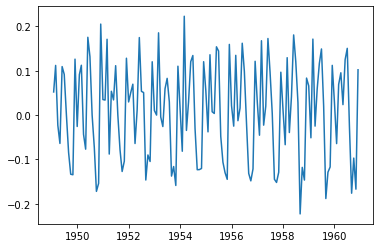

In [18]:
plt.plot(data_log_diff)

Trend has been removed but seasonality is still there

## Exponential Weighted Average

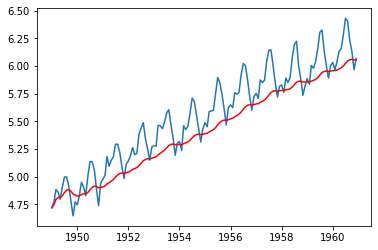

In [19]:
expwighted_avg = data_log.ewm(halflife=12).mean()

plt.plot(data_log)

plt.plot(expwighted_avg, color='red')

There still is a trend in the data

## Stationarity Tests

In [20]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics 
    
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:   
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')    
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')     
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print (dfoutput)

In [21]:
ts = df['passengers']

### Testing the original data for stationarity

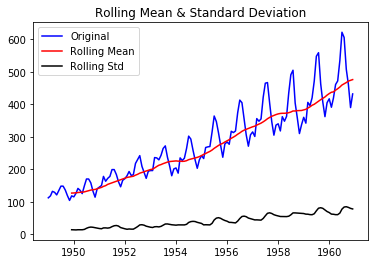

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [22]:
test_stationarity(ts)

### Observations:
P-value is very high

The Standard deviation is stationary as can be seen from the graph

### Log transforming, moving average and differencing the data altogether

In [23]:
data_log= np.log(ts)

moving_avg = pd.Series(data_log).rolling(window=12).mean()

data_log_moving_avg_diff = data_log - moving_avg

data_log_moving_avg_diff.head(12)

date
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: passengers, dtype: float64

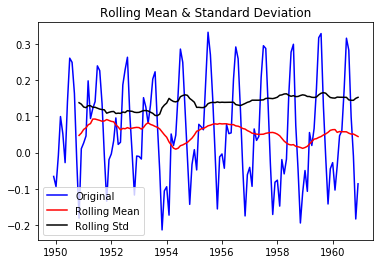

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [24]:
# Checking stationarity of above data

data_log_moving_avg_diff.dropna(inplace=True)

test_stationarity(data_log_moving_avg_diff)

### Observations:
Here p-value < 0.05, which means that we can reject the nul hypothesis

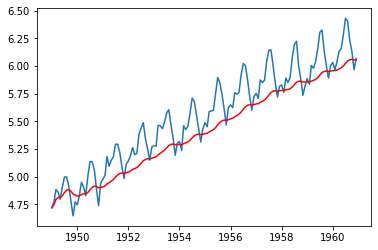

In [26]:
expwighted_avg = data_log.ewm( halflife=12).mean()

plt.plot(data_log)

plt.plot(expwighted_avg, color='red')

## Decomposing the data

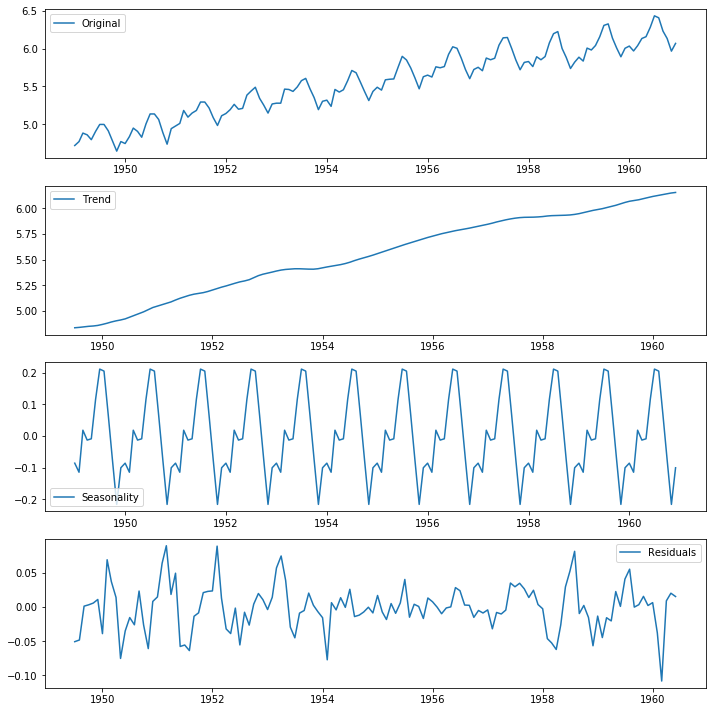

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(data_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

### Using the Residual to check for stationarity

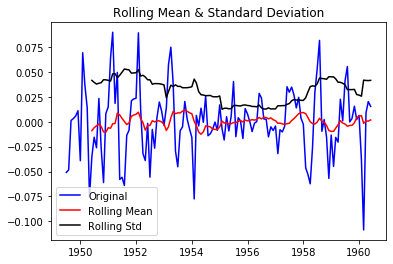

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [28]:
data_log_decompose = residual

data_log_decompose.dropna(inplace=True)

test_stationarity(data_log_decompose)

### Observations:
We can see that P-value here highly supports the alternate hypothesis, meaning, the data after decomposition is stationary

## Model Building

In [29]:
from statsmodels.tsa.arima_model import ARMA, ARIMA

### ARMA

In [30]:
model = ARMA(data_log, order=(2, 0)) 


results_AR = model.fit()  


results_AR.fittedvalues

C:\Users\aditi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


date
1949-01-01    5.504986
1949-02-01    4.737219
1949-03-01    4.803655
1949-04-01    4.925839
1949-05-01    4.873471
                ...   
1960-08-01    6.439450
1960-09-01    6.374843
1960-10-01    6.170143
1960-11-01    6.093523
1960-12-01    5.915533
Length: 144, dtype: float64

In [31]:
train_ERROR = data_log - results_AR.fittedvalues

train_ERROR

date
1949-01-01   -0.786487
1949-02-01    0.033466
1949-03-01    0.079147
1949-04-01   -0.066026
1949-05-01   -0.077681
                ...   
1960-08-01   -0.032570
1960-09-01   -0.144362
1960-10-01   -0.036745
1960-11-01   -0.127377
1960-12-01    0.152892
Length: 144, dtype: float64

In [32]:
# Future Predictions

predictions = results_AR.predict(start=144, end=700)

predictions

1961-01-01    6.074778
1961-02-01    6.059613
1961-03-01    6.040103
1961-04-01    6.020195
1961-05-01    6.000777
                ...   
2007-01-01    5.504986
2007-02-01    5.504986
2007-03-01    5.504986
2007-04-01    5.504986
2007-05-01    5.504986
Freq: MS, Length: 557, dtype: float64

In [33]:
# Reversing Log Transformation

prediction_values = np.exp(results_AR.predict(start=144, end=700))

prediction_values.head()

1961-01-01    434.753178
1961-02-01    428.209705
1961-03-01    419.936412
1961-04-01    411.658881
1961-05-01    403.742542
Freq: MS, dtype: float64

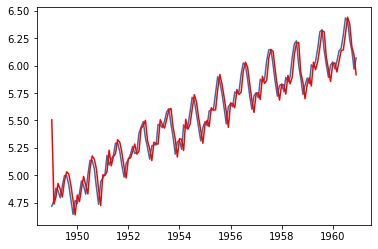

In [34]:
plt.plot(data_log)

plt.plot(results_AR.fittedvalues, color='red')

### ARIMA

In [35]:
model = ARIMA(data_log, order=(2, 1,0)) 

results_AR = model.fit()

C:\Users\aditi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\aditi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [36]:
results_AR.fittedvalues

date
1949-02-01    0.009600
1949-03-01    0.018167
1949-04-01    0.026435
1949-05-01   -0.015768
1949-06-01   -0.002144
                ...   
1960-08-01    0.022921
1960-09-01   -0.023143
1960-10-01   -0.028120
1960-11-01    0.016517
1960-12-01   -0.013713
Length: 143, dtype: float64

In [37]:
results_AR.fittedvalues.cumsum() + 4.718499

date
1949-02-01    4.728099
1949-03-01    4.746266
1949-04-01    4.772701
1949-05-01    4.756932
1949-06-01    4.754788
                ...   
1960-08-01    6.100425
1960-09-01    6.077282
1960-10-01    6.049162
1960-11-01    6.065679
1960-12-01    6.051966
Length: 143, dtype: float64

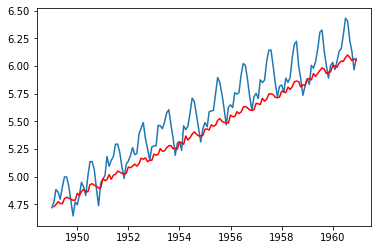

In [38]:
plt.plot(data_log)

plt.plot(results_AR.fittedvalues.cumsum() + 4.718499 , color='red')

In [39]:
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 122.802
Method:                       css-mle   S.D. of innovations              0.102
Date:                Mon, 26 Oct 2020   AIC                           -237.605
Time:                        20:55:53   BIC                           -225.753
Sample:                    02-01-1949   HQIC                          -232.789
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0096      0.009      1.048      0.295      -0.008       0.028
ar.L1.D.passengers     0.2359      0.083      2.855      0.004       0.074       0.398
ar.L2.D.passengers    -0.1725      0.083     -2.070      0.038      -0.336      -0.009
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6838           -2.3088j            2.4079           -0.2042
AR.2            0.6838           +2.3088j            2.4079            0.2042
-----------------------------------------------------------------------------
"""

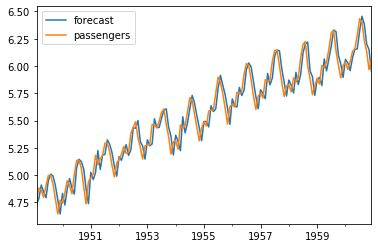

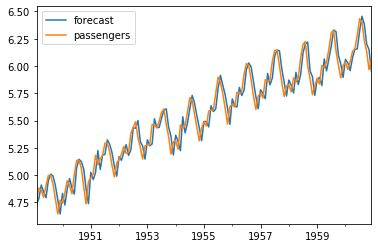

In [40]:
results_AR.plot_predict()

### MA

In [41]:
model = ARIMA(data_log, order=(0, 1, 2))  

results_MA = model.fit()

C:\Users\aditi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\aditi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

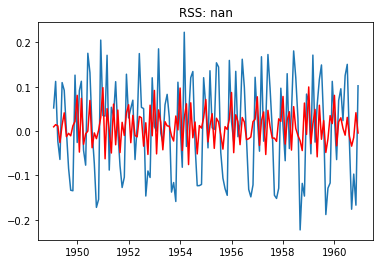

In [42]:
plt.plot(data_log_diff)

plt.plot(results_MA.fittedvalues, color='red')

plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-data_log_diff)**2))

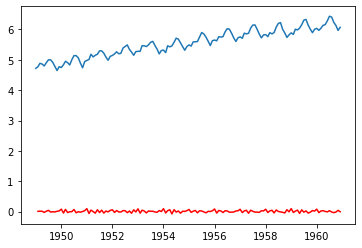

In [43]:
plt.plot(data_log)

plt.plot(results_MA.fittedvalues, color='red')

In [44]:
results_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.passengers   No. Observations:                  143
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 124.189
Method:                       css-mle   S.D. of innovations              0.101
Date:                Mon, 26 Oct 2020   AIC                           -240.379
Time:                        20:55:57   BIC                           -228.528
Sample:                    02-01-1949   HQIC                          -235.563
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0096      0.007      1.314      0.189      -0.005       0.024
ma.L1.D.passengers     0.2019      0.120      1.688      0.091      -0.033       0.436
ma.L2.D.passengers    -0.3409      0.188     -1.814      0.070      -0.709       0.027
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4419           +0.0000j            1.4419            0.5000
MA.2            2.0342           +0.0000j            2.0342            0.0000
-----------------------------------------------------------------------------
"""

### Auto-ARIMA

In [45]:
## !pip install pmdarima

In [46]:
from pmdarima.arima import auto_arima

model = auto_arima(data, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [48]:
data

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [49]:
# Last date of data - 1960-12-01

dti = pd.date_range('1961-01-01', periods=50, freq='MS')  ## MS = monthly or monthly start

dti

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
               '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
               '1963-01-01', '1963-02-01', '1963-03-01', '1963-04-01',
               '1963-05-01', '1963-06-01', '1963-07-01', '1963-08-01',
               '1963-09-01', '1963-10-01', '1963-11-01', '1963-12-01',
               '1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01', '1964-11-01', '1964-12-01',
               '1965-01-01', '1965-02-01'],
              dtype='datetime64[ns]', freq='MS')

In [50]:
forecast = model.predict(n_periods=50)

forecast = pd.DataFrame(forecast,index = dti,columns=['Prediction'])

forecast.head()

,Prediction
1961-01-01,467.573743
1961-02-01,490.494463
1961-03-01,509.136849
1961-04-01,492.554700
1961-05-01,495.305958


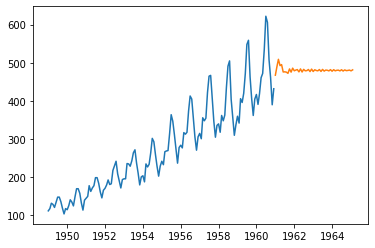

In [52]:
# Plotting the predictions for validation set

plt.plot(data["passengers"], label='Train')

plt.plot(forecast, label='Prediction')

plt.show()